In [481]:
# test every part of my algorithms
# make some fake data
import pandas as pd
import numpy as np
from seriesmodel import SeriesModel
from featurizer import PolynomialFeaturizer
from timeseriesplotter import SpotTimePlot
import matplotlib.pyplot as plt
from itertools import izip
%matplotlib inline

In [482]:
#  Create dummy classes that are just lines and should be easily seperable.
def f1(t):
    x = 2* t + 1 + 2*np.random.randn((len(t)))
    return x

def f2(t):
    x = 3*t - 2 + 2*np.random.randn((len(t)))
    return x
    
def add_t1(df, t):
    data = np.hstack((t.reshape(-1,1), f1(t).reshape(-1,1), f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'1', 'gram':'1', 'detection':1}, ignore_index=True)
def add_t2(df, t):
    data = np.hstack((t.reshape(-1,1), f2(t).reshape(-1,1), f1(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'2', 'gram':'1', 'detection':1}, ignore_index=True)
def add_t3(df, t):
    data = np.hstack((t.reshape(-1,1), 0.5*f2(t).reshape(-1,1), 0.05*f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'Control', 'gram':'Control', 'detection':0}, ignore_index=True)
def add_t4(df, t):
    data = np.hstack((t.reshape(-1,1), 3*f1(t).reshape(-1,1), f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'3', 'gram':'2', 'detection':1}, ignore_index=True)
def add_t5(df, t):
    data = np.hstack((t.reshape(-1,1), -1*f1(t).reshape(-1,1), f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'4', 'gram':'2', 'detection':1}, ignore_index=True)
    
df = pd.DataFrame(columns=['data','classification', 'gram', 'detection'])
t = np.arange(0,25,1)
for i in range(0,10):
    df = add_t1(df,t)
    df = add_t5(df,t)
    df = add_t4(df,t)
for i in range(0,5):
    df = add_t3(df,t)
for i in range(0,8):
    df = add_t2(df,t)
df.head()

,data,classification,gram,detection
0,"[[0.0, -0.239698097062, 0.0783927537216], [1.0...",1,1,1
1,"[[0.0, 0.260266086153, -2.89201279848], [1.0, ...",4,2,1
2,"[[0.0, 4.76749014888, -1.6146524759], [1.0, 12...",3,2,1
3,"[[0.0, 3.69175217935, -1.48862562458], [1.0, 2...",1,1,1
4,"[[0.0, -2.5865054781, -6.25855029448], [1.0, -...",4,2,1


In [483]:
X = df['data']
y = df.drop(['data'], axis=1)
print y.head()
print X.head()

  classification gram  detection
0              1    1          1
1              4    2          1
2              3    2          1
3              1    1          1
4              4    2          1
0    [[0.0, -0.239698097062, 0.0783927537216], [1.0...
1    [[0.0, 0.260266086153, -2.89201279848], [1.0, ...
2    [[0.0, 4.76749014888, -1.6146524759], [1.0, 12...
3    [[0.0, 3.69175217935, -1.48862562458], [1.0, 2...
4    [[0.0, -2.5865054781, -6.25855029448], [1.0, -...
Name: data, dtype: object


In [484]:
# Create a series of models with different classifiers and options.  Plot the micro recall, precision, and overall
# accuracy versus time for each model type.
def plot_results(df, modelname, labelclass='classification', label='micro'):
    rec = df.scores[labelclass][label]['recall'].values
    prec = df.scores[labelclass][label]['precision'].values
    acc = df.scores[labelclass][label]['overall_accuracy'].values
    x = df.scores[labelclass][label]['time'].values
    
    plt.subplot(3,1,1)
    plt.plot(x,rec,label=modelname, marker='o')
    plt.subplot(3,1,2)
    plt.plot(x,prec, label=modelname, marker='o')
    plt.subplot(3,1,3)
    plt.plot(x,acc,label=modelname, marker='o')

In [485]:
models = []
modelnames = []

for c in [0.1, 1, 10]:
    m = 'LR'
    sm = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                     detection_reducer = None, detection_scaler = None, detection_featurizer = None,
                     detection_model = m, detection_model_arguments = {'C': c})
    sm.on_disk = False
    sm.number_of_columns = 3
    sm.fit(X,y, verbose=False)

    models.append(sm)
    modelnames.append(m + ' c:' + str(c))
    
for c in [0.1, 1, 10]:
    m = 'SVM'
    sm = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                     detection_reducer = None, detection_scaler = None, detection_featurizer = None,
                     detection_model = m, detection_model_arguments = {'C': c, 'probability': True})
    sm.on_disk = False
    sm.number_of_columns = 3
    sm.fit(X,y, verbose=False)

    models.append(sm)
    modelnames.append(m + ' c:' + str(c))
        
for n in [10,50,100]:
    m = 'RF'
    sm = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                     detection_reducer = None, detection_scaler = None, detection_featurizer = None,
                     detection_model = m, detection_model_arguments = {'n_estimators': n})
    sm.on_disk = False
    sm.number_of_columns = 3
    sm.fit(X,y, verbose=False)

    models.append(sm)
    modelnames.append(m + ' nt:' + str(n)) 


>> i. Setting-up SeriesModel ...

>> Set-up completed (0.0260720252991 seconds) <<

>> 0. Preprocessing data ...

>> Prepocessing completed (9.91821289062e-05 seconds) <<

>> 1. Featurizing data ...

>> Featurizing completed (0.0210361480713 seconds) <<

>> Pickling featurizers to featurizer.pkl ...
Writing featurizer.pkl ...
... Wrote featurizer.pkl

>> Pickling completed (0.00566601753235 seconds) <<

>> 1A. Pickling features to features.pkl ...
Writing features.pkl ...
... Wrote features.pkl

>> Pickling completed (0 seconds) <<

>> 2. Scaling data ...

>> Scaling completed (0.00167202949524 seconds) <<

>> Pickling scalers to scaler.pkl ...
Writing scaler.pkl ...
... Wrote scaler.pkl

>> Pickling completed (0.00410008430481 seconds) <<

>> 3. Reducing data ...

>> Pickling reducers to reducer.pkl
Writing reducer.pkl ...
... Wrote reducer.pkl

>> Pickling completed (0.00487399101257 seconds) <<

>> 4A. Pickling final features to fold_features.pkl, fold_features_test.pkl
Writing fol

In [486]:
sm2 = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                  detection_reducer = None, detection_scaler = None, detection_featurizer = None, 
                  detection_model = 'LRCV', use_last_timestep_results = False)
sm2.on_disk = False
sm2.verbose = True
sm2.number_of_columns = 3
sm2.fit(X,y,verbose=True)


>> i. Setting-up SeriesModel ...

>> Set-up completed (0.0204789638519 seconds) <<

>> 0. Preprocessing data ...

>> Prepocessing completed (0.000102043151855 seconds) <<

>> 1. Featurizing data ...
Featurizing nt=6 ...
... 0 seconds
Featurizing nt=7 ...
... 0 seconds
Featurizing nt=8 ...
... 0 seconds
Featurizing nt=9 ...
... 0 seconds
Featurizing nt=10 ...
... 0 seconds
Featurizing nt=11 ...
... 0 seconds
Featurizing nt=12 ...
... 0 seconds
Featurizing nt=13 ...
... 0 seconds
Featurizing nt=14 ...
... 0 seconds
Featurizing nt=15 ...
... 0 seconds
Featurizing nt=16 ...
... 0 seconds
Featurizing nt=17 ...
... 0 seconds
Featurizing nt=18 ...
... 0 seconds
Featurizing nt=19 ...
... 0 seconds
Featurizing nt=20 ...
... 0 seconds
Featurizing nt=21 ...
... 0 seconds
Featurizing nt=22 ...
... 0 seconds
Featurizing nt=23 ...
... 0 seconds
Featurizing nt=24 ...
... 0 seconds

>> Featurizing completed (0.0174469947815 seconds) <<

>> Pickling featurizers to featurizer.pkl ...
Writing featurizer

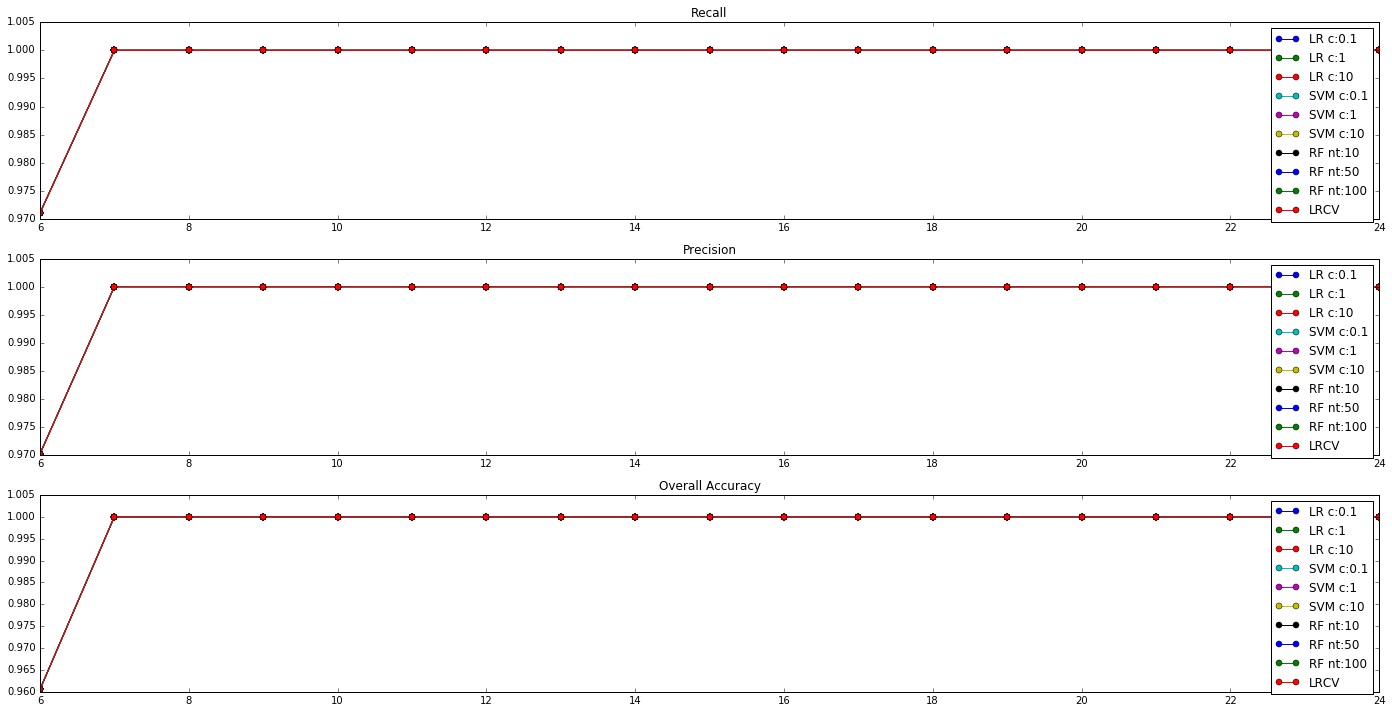

In [487]:
models.append(sm2)
modelnames.append('LRCV')
plt.figure(figsize=(24,12))
for model, modelname in izip(models, modelnames):
    plot_results(model, modelname, labelclass='gram', label='macro')
    
plt.subplot(3,1,1)
plt.title('Recall')
plt.legend()
plt.subplot(3,1,2)

plt.title('Precision')
plt.legend()
plt.subplot(3,1,3)
plt.title('Overall Accuracy')
plt.legend()

In [488]:
sm.scores_test['classification']['micro']

,time,confusion_matrix,accuracy,precision,recall,f1,overall_accuracy
1,6,"[[2, 0, 0, 0, 0], [0, 2, 1, 0, 0], [0, 0, 1, 0...",0.96,0.9,0.9,0.9,0.9
2,7,"[[2, 0, 0, 0, 0], [0, 2, 1, 0, 0], [0, 0, 1, 0...",0.96,0.9,0.9,0.9,0.9
3,8,"[[2, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 1, 0...",0.92,0.8,0.8,0.8,0.8
4,9,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
5,10,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
6,11,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
7,12,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
8,13,"[[2, 0, 0, 0, 0], [0, 2, 0, 1, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
9,14,"[[2, 0, 0, 0, 0], [0, 2, 0, 1, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
10,15,"[[2, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 2, 0...",0.92,0.8,0.8,0.8,0.8


In [489]:
print sm.scores_test['classification']['micro'].iloc[0]['confusion_matrix']
print sm.confusion_labels['classification']

[[2 0 0 0 0]
 [0 2 1 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
['Control' '1' '2' '3' '4']


In [490]:
sm.fold_predictions_test[0]['classification']

array(['1', '1', '2', '4', 'Control'], dtype=object)

In [491]:
sm2.scores_test['classification']['micro']

,time,confusion_matrix,accuracy,precision,recall,f1,overall_accuracy
1,6,"[[2, 0, 0, 0, 0], [0, 2, 1, 0, 0], [0, 0, 1, 0...",0.96,0.9,0.9,0.9,0.9
2,7,"[[2, 0, 0, 0, 0], [0, 2, 1, 0, 0], [0, 0, 1, 0...",0.96,0.9,0.9,0.9,0.9
3,8,"[[2, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 1, 0...",0.92,0.8,0.8,0.8,0.8
4,9,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
5,10,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
6,11,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
7,12,"[[2, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 0...",1.00,1.0,1.0,1.0,1.0
8,13,"[[2, 0, 0, 0, 0], [0, 2, 0, 1, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
9,14,"[[2, 0, 0, 0, 0], [0, 2, 0, 1, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
10,15,"[[2, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 2, 0...",0.92,0.8,0.8,0.8,0.8


In [492]:
sm.results[['time', 'fold', 'test_classification_predictions']].iloc[0:4]

,time,fold,test_classification_predictions
1,6,0,"[1, 3, 2, 4, Control]"
2,6,1,"[Control, 4, 1, 3, 1]"
3,7,0,"[1, 3, 2, 4, Control]"
4,7,1,"[Control, 4, 1, 3, 1]"


In [493]:
idx = np.hstack((sm.folds[0]['test'], sm.folds[1]['test']))
y.iloc[idx]

,classification,gram,detection
15,1,1,1
17,3,2,1
42,2,1,1
7,4,2,1
31,Control,Control,0
34,Control,Control,0
16,4,2,1
38,2,1,1
11,3,2,1
9,1,1,1


In [494]:
from sklearn.metrics import accuracy_score
yt = y.iloc[idx]['classification'].values
yp = sm.results[sm.results['time'] == 6]['test_classification_predictions'].values
yp = np.hstack(yp)
print yt.shape, yp.shape
print yt
print yp

print 'ACC', accuracy_score(yt, yp)

(10,) (10,)
['1' '3' '2' '4' 'Control' 'Control' '4' '2' '3' '1']
['1' '3' '2' '4' 'Control' 'Control' '4' '1' '3' '1']
ACC 0.9


In [382]:
## Now experiment with featurizer to confirm that this is working correctly

smf = SeriesModel(detection_featurizer='poly', nfolds=2, fold_size=0.1, max_time=25, 
                  color_vector_type='I', reference_time = 5, 
                     detection_reducer = None, detection_scaler = None)
smf.on_disk = False
smf.number_of_columns = 3
smf.fit(X, y)



>> i. Setting-up SeriesModel ...

>> Set-up completed (0.027804851532 seconds) <<

>> 0. Preprocessing data ...

>> Prepocessing completed (0.000101089477539 seconds) <<

>> 1. Featurizing data ...
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds
Regressed 43 trials, n=4 in 0 seconds

>> Featurizing completed (1.11879205704 seconds) <<

>> Pickling featurizers t

(25, 5)


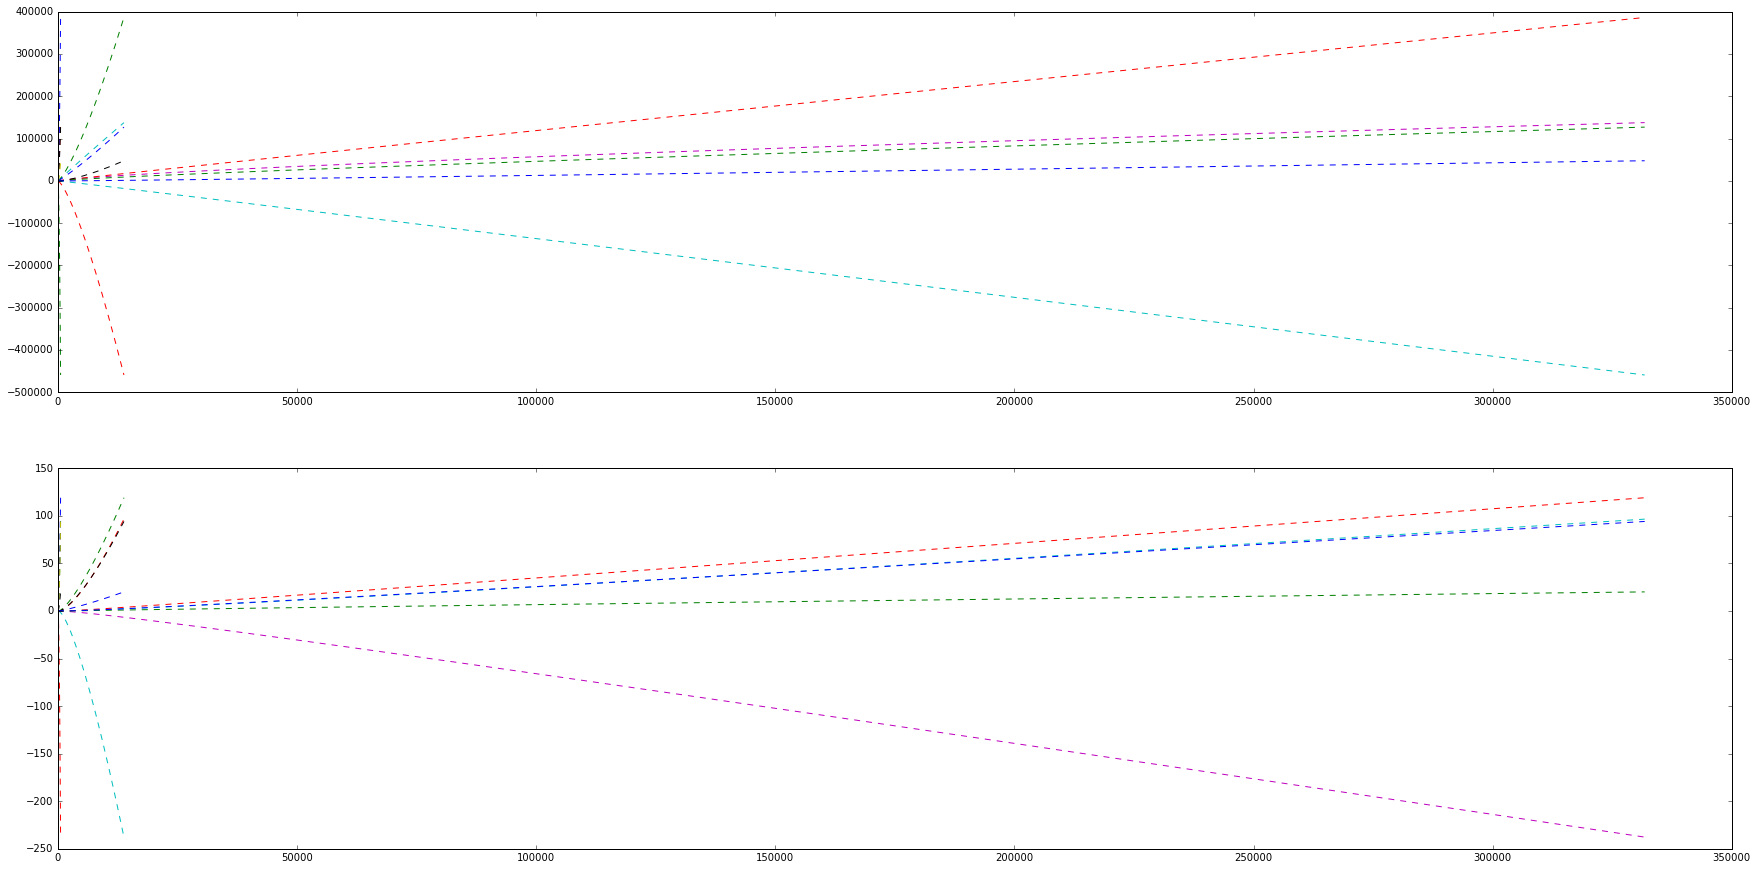

In [495]:
## look at features ##
plt.figure(figsize=(30,15))

p2 = PolynomialFeatures(degree=4)
ttt = t.copy()
ttt = p2.fit_transform(ttt.reshape(-1,1))
print ttt.shape

for i, row in enumerate(smf.features['detection'][24][0:5]):
#     print i
#     print row[0:5]
#     print row[5:]

    y1 = np.dot(ttt, row[0:5])
    y2 = np.dot(ttt, row[5:])

    y3 = X.iloc[i][:,1]
    y4 = X.iloc[i][:,2]
    tt = X.iloc[i][:,0]
    
    plt.subplot(2,1,1)
    plt.plot(ttt,y1, '--')
    plt.plot(tt, y3)
    
    plt.subplot(2,1,2)
    plt.plot(ttt,y2,'--')
    plt.plot(tt,y4)


In [440]:
guy = smf.featurizers['classification'][6]
guy.


2

In [385]:
y.head()

,classification,gram,detection
0,1,1,1
1,4,2,1
2,3,2,1
3,1,1,1
4,4,2,1


In [373]:
STP = SpotTimePlot(y, ['time', 'A','B'])

                gram  detection
classification                 
1                 10         10
2                  8          8
3                 10         10
4                 10         10
Control            5          5


In [496]:
## inspect the output for what we would expect ##

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

T = poly.fit_transform(t.reshape(-1,1))
# print T

In [421]:
z = np.sum(T, axis=1)*(1+0.05*np.random.randn(1))
# print z

In [422]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LassoCV, RidgeCV

ms = [LinearRegression(fit_intercept=False), Ridge(fit_intercept=False), Lasso(fit_intercept=False), 
      LassoCV(fit_intercept=False), RidgeCV(fit_intercept=False)]
for m in ms:
    m.fit(T, z)
    print m.coef_
    print m.score(T,z)

[ 1.03735416  1.03735416  1.03735416  1.03735416]
1.0
[ 0.91316356  1.04640389  1.03717536  1.0373552 ]
1.0
[  8.34178505e+03  -9.22866368e+02   2.30072047e+01   8.95580732e-01]
0.999910647349
[ 0.          0.          0.          1.04861694]
0.999990985275
[ 1.02328964  1.03837048  1.03643521  0.96783655]
0.992209116566


In [423]:
w = T[:,0]*2 + T[:,1]*3 - T[:,2]*1 + T[:,3]*0.5 + np.random.randn(len(T))
# print w

In [424]:
for m in ms:
    m.fit(T, w)
    print m.coef_
    print m.score(T,w)

[ 2.30161337  2.98593405 -0.9997663   0.49999921]
0.99999999995
[ 2.03337554  3.00522381 -1.0001447   0.5000014 ]
0.999999999949
[  4.13463194e+03  -4.55021357e+02   9.89349252e+00   4.29697106e-01]
0.999899415344
[-0.         -0.          0.          0.48821374]
0.999974323101
[ 2.27123626  2.98812522 -1.00023045  0.46782732]
0.992358482426


In [472]:
## now passing the appropriate info
from featurizer import PolynomialFeaturizer
p3 = PolynomialFeaturizer(n=4, gridsearch=True)
Xcoef, scores = p3.fit_transform(X)


Featurizing trial 0
Regressed 43 trials, n=4 in 1 seconds


In [473]:
Xpred = p3.predict(X, Xcoef)

<class 'pandas.core.series.Series'> 0    [[0.0, 0.0, 0.0], [1.0, 0.000184996979494, 0.0...
1    [[0.0, 0.0, 0.0], [1.0, -0.000182402892342, 0....
2    [[0.0, 0.0, 0.0], [1.0, 0.000556049804938, 0.0...
3    [[0.0, 0.0, 0.0], [1.0, 0.000189989925436, 0.0...
4    [[0.0, 0.0, 0.0], [1.0, -0.000192385324482, 0....
Name: data, dtype: object
<class 'pandas.core.series.Series'> 0    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
1    [[-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0,...
2    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
3    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
4    [[-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0,...
Name: data, dtype: object
0 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
1 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
2 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
3 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
4 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
5 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
6 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
7 (5, 2) (25, 3)
(25, 5) (25, 3) (5, 2)
8 (5, 

In [480]:
print Xpred.head()
print Xcoef.head()
print scores.head()
print X.head()

0    [[0.0, 0.0, 0.0], [1.0, 0.000184811982515, 0.0...
1    [[0.0, 0.0, 0.0], [1.0, -0.00018222048945, 0.0...
2    [[0.0, 0.0, 0.0], [1.0, 0.000555493755133, 0.0...
3    [[0.0, 0.0, 0.0], [1.0, 0.000189799935511, 0.0...
4    [[0.0, 0.0, 0.0], [1.0, -0.000192192939158, 0....
Name: data, dtype: object
0    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
1    [[-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0,...
2    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
3    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
4    [[-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0,...
Name: data, dtype: object
0    [0.999998453006, 0.999998453006]
1    [0.999998453006, 0.999998453006]
2    [0.999998453006, 0.999998453006]
3    [0.999998453006, 0.999998453006]
4    [0.999998453006, 0.999998453006]
Name: data, dtype: object
0    [[0.0, 0.0, 0.0], [1.0, 0.000184811982515, 0.0...
1    [[0.0, 0.0, 0.0], [1.0, -0.00018222048945, 0.0...
2    [[0.0, 0.0, 0.0], [1.0, 0.000555493755133, 0.0...
3    [[0.0, 0.0, 

classification    2
gram              1
detection         1
Name: 42, dtype: object


ValueError: Can only tuple-index with a MultiIndex

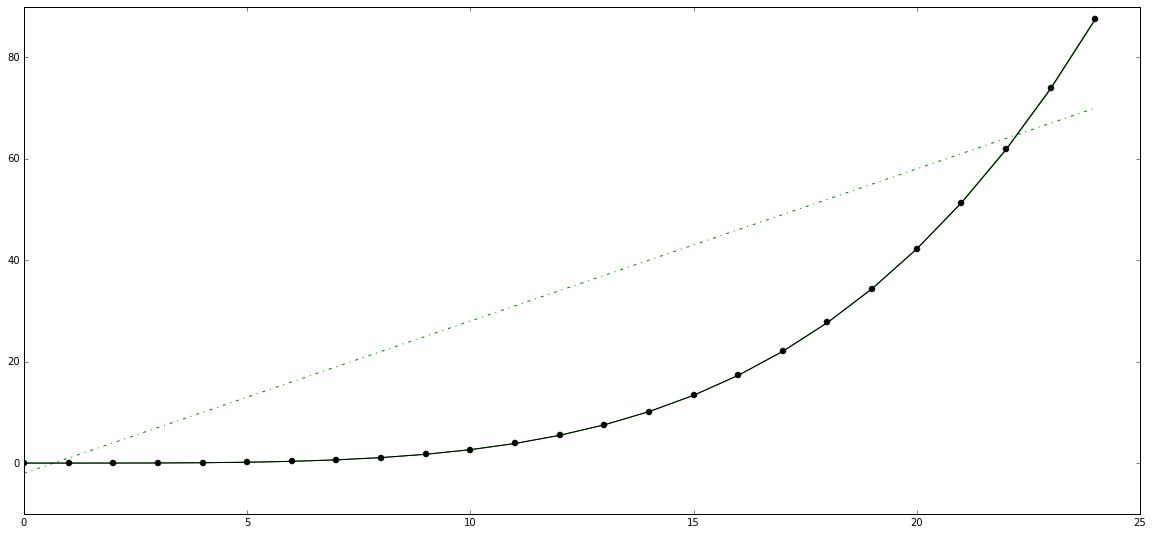

In [474]:
t = np.arange(0,25,1)
print y.iloc[42]
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.plot(t, X.iloc[42][:,1], 'g', label='raw')
plt.plot(t, 3*t-2, 'g-.', label='3t-2')
plt.plot(t, 0.00026399*t**4, 'k-o', label='f')
plt.plot(t, Xpred[:,1], 'g', label='pred')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, 0.000193*t**4, 'k-o', label='f')
plt.plot(t, 2*t+1, 'r-.', label='2t+1')
plt.plot(t, X.iloc[42][:,2], 'r')
plt.legend()

plt.tight_layout()

(array([  1.36827931e-03,   5.72189529e-03,   1.11950125e-02,
          2.93558106e-02,   5.92091774e-02,   1.03616060e-01,
          1.47276609e-01,   1.87205487e-01,   1.92554215e-01,
          1.78125088e-01,   1.39937657e-01,   9.76453870e-02,
          5.09995015e-02,   2.37583044e-02,   1.08218454e-02,
          3.73167084e-03,   6.21945140e-04,   4.97556112e-04,
          1.24389028e-04,   1.24389028e-04]),
 array([-6.77507208, -5.97114265, -5.16721323, -4.3632838 , -3.55935438,
        -2.75542495, -1.95149552, -1.1475661 , -0.34363667,  0.46029276,
         1.26422218,  2.06815161,  2.87208104,  3.67601046,  4.47993989,
         5.28386932,  6.08779874,  6.89172817,  7.6956576 ,  8.49958702,
         9.30351645]),
 <a list of 20 Patch objects>)

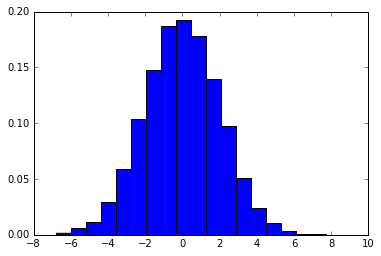

In [455]:
plt.hist(2*np.random.randn(10000), bins=20, normed=True)